In [1]:
import pandas as pd 
data_path = '../input/'
train = pd.read_pickle(data_path+'/train.pkl')
train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [2]:
train.shape

(24236806, 10)

In [3]:
train['datetime'] = pd.to_datetime(train['timestamp'], unit='s')

df_train = train[train['datetime'] < '2021-06-13 00:00:00']
df_train = df_train.dropna(how="any").reset_index(drop=True)

y_train = df_train.Target
df_train.drop('Target', axis=1, inplace=True)
df_train.shape

(21473088, 10)

In [4]:
df_train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,datetime
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,2018-01-01 00:01:00
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,2018-01-01 00:01:00
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,2018-01-01 00:01:00
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,2018-01-01 00:01:00
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,2018-01-01 00:01:00


In [5]:
y_train.shape

(21473088,)

<AxesSubplot:title={'center':'PurgedGroupTimeSeriesSplit'}, xlabel='Sample index', ylabel='CV iteration'>

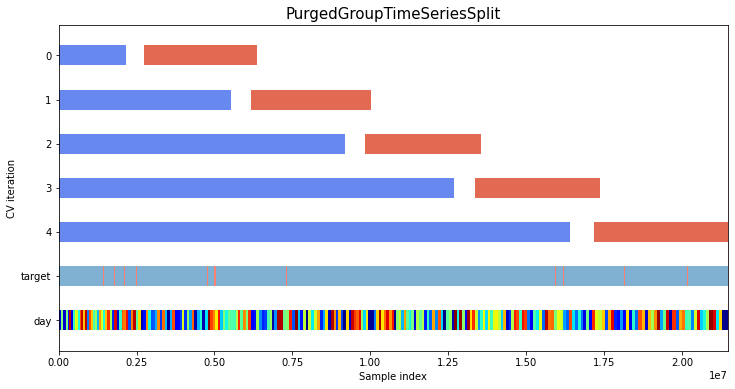

In [6]:
import sys
sys.path.append('../src')
from utils import PurgedGroupTimeSeriesSplit, plot_cv_indices
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 6))
groups = pd.factorize(df_train['datetime'].dt.day.astype(str) + '_' + df_train['datetime'].dt.month.astype(str) + '_' + df_train['datetime'].dt.year.astype(str))[0]
cv = PurgedGroupTimeSeriesSplit(n_splits = 5, group_gap = 50)

plot_cv_indices(cv, df_train, y_train, groups, ax, 5, lw=20)

<AxesSubplot:title={'center':'PurgedGroupTimeSeriesSplit'}, xlabel='Sample index', ylabel='CV iteration'>

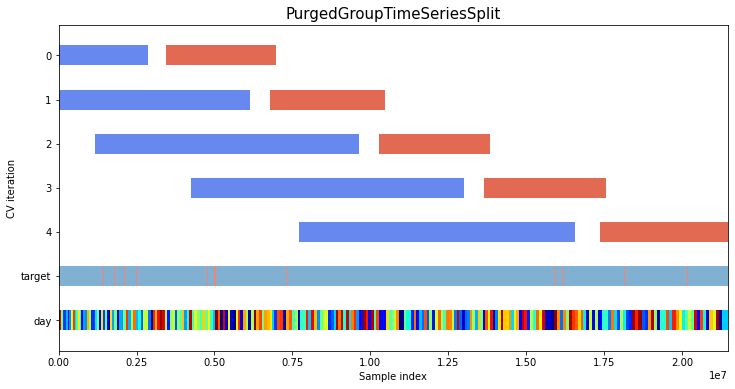

In [7]:
fig, ax = plt.subplots(figsize = (12, 6))

cv = PurgedGroupTimeSeriesSplit(n_splits = 5, group_gap = 50, max_train_group_size=500, max_test_group_size=200)

plot_cv_indices(cv, df_train, y_train, groups, ax, 5, lw=20)

<AxesSubplot:title={'center':'PurgedGroupTimeSeriesSplit'}, xlabel='Sample index', ylabel='CV iteration'>

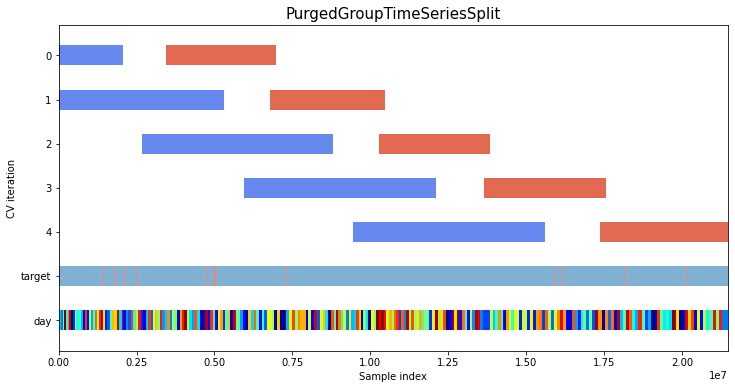

In [8]:
fig, ax = plt.subplots(figsize = (12, 6))

cv = PurgedGroupTimeSeriesSplit(n_splits = 5, group_gap = 100, max_train_group_size=350, max_test_group_size=200)

plot_cv_indices(cv, df_train, y_train, groups, ax, 5, lw=20)

<AxesSubplot:title={'center':'PurgedGroupTimeSeriesSplit'}, xlabel='Sample index', ylabel='CV iteration'>

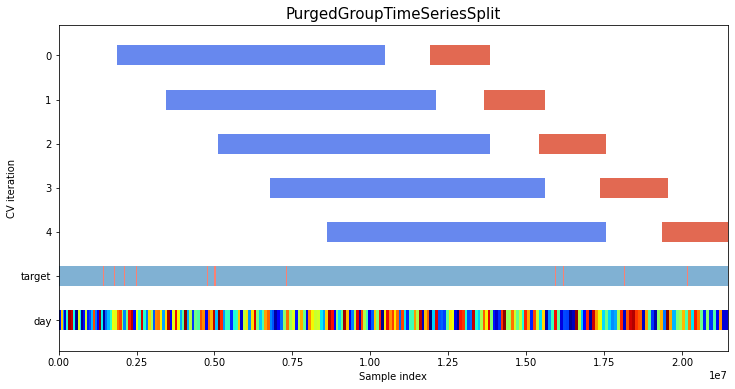

In [9]:
fig, ax = plt.subplots(figsize = (12, 6))

cv = PurgedGroupTimeSeriesSplit(n_splits = 5, group_gap = 100, max_train_group_size=500, max_test_group_size=100)

plot_cv_indices(cv, df_train, y_train, groups, ax, 5, lw=20)